In [503]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [504]:
df=pd.read_csv("Sep-09-2022_10000matches.csv")

C:\Users\kirby\AppData\Local\Temp\ipykernel_20492\1913969965.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Sep-09-2022_10000matches.csv")


In [505]:
df

,Unnamed: 0,assists,GameID,GameMode,baronKills,bountyLevel,champExperience,champLevel,championName,damageDealtToObjectives,...,totalTimeSpentDead,1DamageDealtToChampions,1DamageTaken,turretTakedowns,turretsLost,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,0,20,NA1_4430908515,ARAM,0,0,14531,15,Ashe,112,...,74,797,465,1,4,5,0,0,0,0
1,0,3,4035079604,CLASSIC,0,3,15453,16,Sett,18147,...,156,2556,686,4,4,10,0,0,7,1
2,0,19,4035079604,CLASSIC,0,3,13168,15,Trundle,27626,...,82,956,1571,6,4,21,3,0,11,1
3,0,6,4035079604,CLASSIC,0,1,13619,15,Sylas,10629,...,127,600,935,6,4,8,0,0,5,1
4,0,7,4035079604,CLASSIC,1,1,10674,13,KogMaw,13624,...,118,2202,521,3,4,3,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0,5,4035205190,CLASSIC,0,0,10796,13,Mordekaiser,1137,...,251,528,1134,0,10,16,1,0,5,0
99997,0,2,4035205190,CLASSIC,0,0,10318,13,MasterYi,6707,...,336,5998,1147,0,10,14,1,0,7,0
99998,0,4,4035205190,CLASSIC,0,0,9898,12,Qiyana,337,...,227,1077,433,0,10,16,1,0,9,0
99999,0,1,4035205190,CLASSIC,0,0,8304,11,Kalista,3931,...,166,272,116,0,10,17,1,3,9,0


In [506]:
df.columns

Index(['Unnamed: 0', 'assists', 'GameID', 'GameMode', 'baronKills',
       'bountyLevel', 'champExperience', 'champLevel', 'championName',
       'damageDealtToObjectives', 'damageSelfMitigated', 'deaths',
       'dragonKills', 'firstBloodAssist', 'firstBloodKill',
       'gameEndedInSurrender', 'goldEarned', 'goldSpent', 'individualPosition',
       'inhibitorKills', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'kills', 'lane', 'largestCriticalStrike',
       'largestKillingSpree', 'longestTimeSpentLiving',
       'magicDamageDealtToChampions', 'magicDamageTaken', 'nexusLost',
       'objectivesStolen', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'spell1Casts', 'spell2Casts', 'spell3Casts',
       'spell4Casts', 'summoner1Casts', 'summoner1Id', 'summoner2Casts',
       'summoner2Id', 'summonerId', 'teamEarlySurrendered', 'teamId',
       'timeCCingOthers', 'timePlayed', 'totalDamageDealtToChampions',
       'totalDamageShi

In [507]:
x=pd.DataFrame(df,columns=['deaths', 'champExperience','longestTimeSpentLiving','totalMinionsKilled', 'totalTimeCCDealt','goldEarned', 'goldSpent',
                           'totalDamageTaken','totalTimeSpentDead','totalDamageDealtToChampions'])

In [508]:
x

,deaths,champExperience,longestTimeSpentLiving,totalMinionsKilled,totalTimeCCDealt,goldEarned,goldSpent,totalDamageTaken,totalTimeSpentDead,totalDamageDealtToChampions
0,3,14531,534,27,719,11358,10550,8149,74,22976
1,6,15453,414,132,131,14062,11650,29672,156,23814
2,4,13168,307,18,434,10577,9500,33209,82,15748
3,5,13619,627,148,323,13858,11650,27856,127,30404
4,6,10674,494,119,240,9292,8525,15774,118,10578
...,...,...,...,...,...,...,...,...,...,...
99996,7,10796,630,116,18,7291,6760,21705,251,11727
99997,12,10318,308,63,82,10471,9750,26577,336,14657
99998,10,9898,337,120,43,8346,7825,20135,227,15307
99999,7,8304,406,115,53,8547,8275,19208,166,10052


In [509]:
y=pd.DataFrame(df,columns=['win'])

In [510]:
y

,win
0,0
1,1
2,1
3,1
4,1
...,...
99996,0
99997,0
99998,0
99999,0


In [511]:
x.iloc[2514,]

deaths                             4
champExperience                14267
longestTimeSpentLiving           603
totalMinionsKilled               172
totalTimeCCDealt                  96
goldEarned                     15274
goldSpent                      13850
totalDamageTaken               22663
totalTimeSpentDead                99
totalDamageDealtToChampions    32614
Name: 2514, dtype: int64

In [512]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=99700,random_state=15)

In [513]:
x_train

,deaths,champExperience,longestTimeSpentLiving,totalMinionsKilled,totalTimeCCDealt,goldEarned,goldSpent,totalDamageTaken,totalTimeSpentDead,totalDamageDealtToChampions
99245,8,11901,843,54,157,10701,10650,21601,231,30001
97450,7,11184,322,15,288,7016,6775,16699,138,7865
93428,1,6904,728,79,9,3916,2900,5501,30,3223
10453,9,15349,717,142,231,11536,10400,23527,395,30184
35284,8,10454,341,145,42,10555,9825,22032,175,12558
...,...,...,...,...,...,...,...,...,...,...
49015,3,11148,790,19,112,11086,9925,14959,91,15131
68229,7,14099,366,132,117,15449,13550,25984,202,35849
8076,2,12123,585,124,338,10784,9180,16083,55,14231
52981,9,14301,334,177,63,11177,10880,35862,292,32279


In [514]:
scalestandard=StandardScaler()

In [515]:
x_train=scalestandard.fit_transform(x_train)

In [516]:
x_train=pd.DataFrame(x_train,columns=['deaths', 'champExperience','longestTimeSpentLiving','totalMinionsKilled', 'totalTimeCCDealt','goldEarned', 'goldSpent',
                           'totalDamageTaken','totalTimeSpentDead','totalDamageDealtToChampions'])

In [517]:
x_train

,deaths,champExperience,longestTimeSpentLiving,totalMinionsKilled,totalTimeCCDealt,goldEarned,goldSpent,totalDamageTaken,totalTimeSpentDead,totalDamageDealtToChampions
0,0.573098,-0.205313,0.973260,-0.798654,-0.268332,-0.062546,0.176059,-0.179599,0.397177,1.124551
1,0.265058,-0.364032,-0.916351,-1.355190,0.338946,-1.052622,-0.899717,-0.602457,-0.406391,-0.936382
2,-1.583182,-1.311475,0.556168,-0.441900,-0.954417,-1.885521,-1.975492,-1.568422,-1.339567,-1.368567
3,0.881138,0.557954,0.516272,0.457119,0.074710,0.161799,0.106654,-0.013458,1.814222,1.141589
4,0.573098,-0.525628,-0.847440,0.499929,-0.801439,-0.101773,-0.052977,-0.142420,-0.086692,-0.499448
...,...,...,...,...,...,...,...,...,...,...
296,-0.967102,-0.372001,0.781035,-1.298109,-0.476939,0.040894,-0.025215,-0.752553,-0.812496,-0.259894
297,0.265058,0.281248,-0.756767,0.314417,-0.453761,1.213133,0.981155,0.198488,0.146602,1.669019
298,-1.275142,-0.156170,0.037522,0.200256,0.570731,-0.040246,-0.232042,-0.655594,-1.123554,-0.343687
299,0.881138,0.325964,-0.872828,0.956574,-0.704089,0.065344,0.239911,1.050587,0.924248,1.336640


In [518]:
x_train.describe().round(3)

,deaths,champExperience,longestTimeSpentLiving,totalMinionsKilled,totalTimeCCDealt,goldEarned,goldSpent,totalDamageTaken,totalTimeSpentDead,totalDamageDealtToChampions
count,301.000,301.000,301.000,301.000,301.000,301.000,301.000,301.000,301.000,301.000
mean,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-1.891,-2.840,-2.084,-1.569,-0.996,-2.754,-2.781,-2.043,-1.599,-1.669
25%,-0.659,-0.576,-0.662,-1.013,-0.658,-0.616,-0.594,-0.655,-0.735,-0.698
50%,-0.043,-0.034,-0.111,0.200,-0.268,-0.064,-0.053,-0.180,-0.164,-0.177
75%,0.573,0.516,0.444,0.714,0.422,0.540,0.540,0.461,0.544,0.578
max,3.653,3.735,4.045,3.582,7.682,3.909,4.208,4.193,3.058,5.127


In [519]:
pca1=PCA()

In [520]:
x_pca1=pca1.fit(x_train)

In [521]:
x_pca1

PCA()

In [522]:
x_pca1.explained_variance_ratio_

array([0.52770394, 0.18264668, 0.10591934, 0.06887454, 0.04887284,
       0.03023264, 0.01764421, 0.01094684, 0.00469131, 0.00246765])

In [523]:
pca2=PCA(0.95)

In [524]:
x_pca2=pca2.fit(x_train)

In [525]:
x_pca2.explained_variance_ratio_

array([0.52770394, 0.18264668, 0.10591934, 0.06887454, 0.04887284,
       0.03023264])

In [526]:
pca=PCA(n_components=2)

In [527]:
x_pca=pca.fit_transform(x_train)

In [528]:
x_pca

array([[ 4.18031280e-01,  1.43155206e-01],
       [-1.88099202e+00,  1.22427171e+00],
       [-4.19458492e+00, -9.07970580e-01],
       [ 1.68800178e+00,  6.71902059e-01],
       [-4.75292451e-01,  6.83731087e-01],
       [-5.37680364e-01,  1.30822658e+00],
       [ 1.08087938e+00,  2.99902724e-01],
       [ 2.53361579e+00,  6.93435718e-01],
       [-3.89719232e+00,  1.07157050e+00],
       [ 6.44197045e-01, -9.64809405e-01],
       [-1.79538415e+00,  1.44822936e+00],
       [-9.84807193e-01,  1.46957261e+00],
       [ 1.02834543e+00,  2.91919354e+00],
       [-2.88224543e+00,  1.51519035e+00],
       [ 1.77629306e-01, -1.59496926e+00],
       [-9.28006505e-01,  1.61877756e+00],
       [ 1.69678075e-01,  1.86977435e-01],
       [-1.57133523e-01, -3.96071021e-01],
       [ 1.22946546e+00, -3.70839954e-02],
       [ 3.18488751e-01, -1.18722460e+00],
       [-1.92978040e+00,  2.09617748e+00],
       [ 9.24510896e-02,  5.21827379e-01],
       [-6.18740013e+00,  8.36237809e-01],
       [ 2.

In [529]:
x_pca[:,0]

array([ 4.18031280e-01, -1.88099202e+00, -4.19458492e+00,  1.68800178e+00,
       -4.75292451e-01, -5.37680364e-01,  1.08087938e+00,  2.53361579e+00,
       -3.89719232e+00,  6.44197045e-01, -1.79538415e+00, -9.84807193e-01,
        1.02834543e+00, -2.88224543e+00,  1.77629306e-01, -9.28006505e-01,
        1.69678075e-01, -1.57133523e-01,  1.22946546e+00,  3.18488751e-01,
       -1.92978040e+00,  9.24510896e-02, -6.18740013e+00,  2.02298163e+00,
        4.33551430e+00, -1.76548847e+00, -7.34879508e-01,  2.34024282e+00,
        1.63550264e+00, -5.76255108e-01, -3.15359803e-02, -1.07980738e+00,
       -8.86084873e-01,  3.10873815e+00, -2.80748063e+00, -1.29285205e+00,
       -2.66423206e+00,  1.27388832e+00,  3.64900472e+00, -1.86224046e+00,
       -6.11707190e-01,  1.75358486e+00, -2.66296172e+00,  3.26247367e-01,
       -8.51019824e-01, -1.05308335e+00, -1.55885205e+00, -2.28521910e-01,
       -1.21691958e+00, -1.53460759e+00,  1.80988436e+00, -9.17728743e-01,
       -1.39628937e+00,  

In [530]:
y_train=pd.DataFrame.to_numpy(y_train)

In [531]:
y_train

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [532]:
y_train=pd.DataFrame(y_train, columns=["win"])

In [533]:
y_train

,win
0,0
1,0
2,0
3,1
4,0
...,...
296,1
297,1
298,1
299,0


In [534]:
x_pca=pd.DataFrame(x_pca,columns=["pc1",'pc2'])

In [535]:
x_pca

,pc1,pc2
0,0.418031,0.143155
1,-1.880992,1.224272
2,-4.194585,-0.907971
3,1.688002,0.671902
4,-0.475292,0.683731
...,...,...
296,-1.324914,-0.959862
297,1.756644,-0.099763
298,-1.054398,-1.339342
299,1.682007,0.997576


Text(0, 0.5, 'pc2')

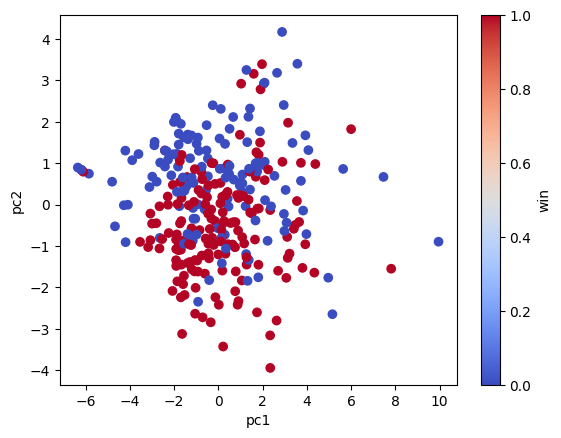

In [536]:
plt.figure()
plor=plt.scatter(x_pca['pc1'],x_pca['pc2'],c=pd.DataFrame.to_numpy(y_train),cmap='coolwarm')
plt.colorbar(plor,label='win')
plt.xlabel("pc1")
plt.ylabel('pc2')

